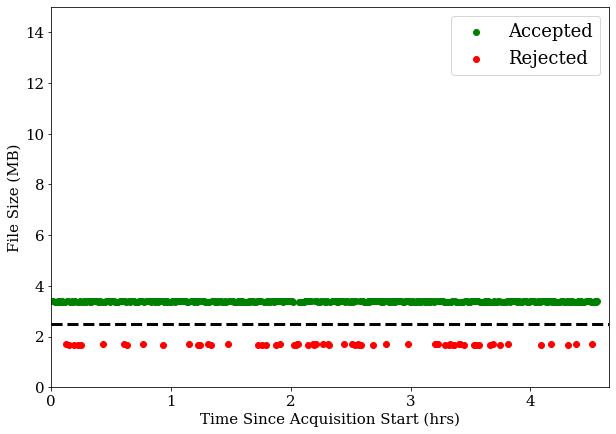

In [63]:
import numpy as np
from numpy import random
import json
import scipy as sp
from scipy import signal
from numpy.matlib import repmat
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from sklearn import mixture
import glob
import os
import importlib
import sys
import uproot
import time
import MiXHelper20230317 as MiXHelper
importlib.reload(MiXHelper)

ts = 15
params = {'legend.fontsize': 'large',
          'font.family': 'serif',
          'figure.figsize': (10,7),
          'axes.labelsize': ts,
          'axes.titlesize': ts,
          'xtick.labelsize': ts,
          'ytick.labelsize': ts}
plt.rcParams.update(params)

###########################################change##############################################
#path of reduced data
filePath = '/nfs/turbo/lsa-MiXturbo/MiX-2023-data/reducedData/20230123/Cs137_C3500_G3000_616_692_634_625_1136_tSumTrigger/'
#path of raw data files
rawPath = '/nfs/turbo/lsa-MiXturbo/MiX-2023-data/MiXData/20230123/Cs137_C3500_G3000_616_692_634_625_1136_tSumTrigger/'
#path of gain file
gainFile = '/nfs/turbo/lsa-MiXturbo/MiX-2023-analysis/20230120/gainparams20230123.csv'
#path of analysis params file
aparFile = '/nfs/turbo/lsa-MiXturbo/MiX-2023-analysis/20230120/AnalysisParams20230120.json'
###############################################################################################

fileNames = MiXHelper.getFileList(filePath, '*.root')
fileSizes = MiXHelper.getFileSizes(fileNames)
fileTimes = MiXHelper.getFileUnixTimes(fileNames, relative = True)
rawNames = MiXHelper.getFileList(rawPath, '*.root')

###########################################change##############################################
fileCut = 2.5e6
###############################################################################################
fileMask = fileSizes >= fileCut
fileReject = np.invert(fileMask)

plt.figure()
plt.scatter(fileTimes[fileMask]/3600, fileSizes[fileMask]/1e6, c = 'green', label = 'Accepted')
plt.scatter(fileTimes[fileReject]/3600, fileSizes[fileReject]/1e6, c = 'red', label = 'Rejected')
plt.plot([0, fileTimes[-1]/3600 + 0.1], [fileCut/1e6, fileCut/1e6], 'k--', linewidth = 3)
plt.xlim([0, fileTimes[-1]/3600 + 0.1])
plt.ylim([0, 15])
plt.xlabel('Time Since Acquisition Start (hrs)')
plt.ylabel('File Size (MB)')
plt.legend(fontsize = 18, loc = 'upper right')
plt.show()

with open(aparFile) as paramsFile:
    
    paramsData = json.load(paramsFile)
    RQs = paramsData['RQs']
    
    dVperAdc = paramsData['dVperAdc']
    resistance = paramsData['resistance']
    samplingFreq = paramsData['samplingFreq']
    voltages = paramsData['voltages']
    
    PEThreshold = paramsData['PEThreshold']
    baselineSamples = paramsData['baselineSamples']
    absoluteSpacing = paramsData['absoluteSpacing']
    relativeSpacing = paramsData['relativeSpacing']
    cartCoor = paramsData['cartCoor']

#fixes issue where some files don't get reduced for whatever reason
fileNamesTime = np.array([name[126:] for name in fileNames])
rawNamesClean = np.array([])
for i in range(len(rawNames)):
    Name = rawNames[i][122:]
    if Name in fileNamesTime:
        rawNamesClean = np.append(rawNamesClean,rawNames[i])
        
selFiles = fileNames[fileMask]
rawFiles = rawNamesClean[fileMask]

mV = dVperAdc*1000
gains  = MiXHelper.calcGains(voltages,gainFile)
PE = MiXHelper.scaleToPE(dVperAdc, resistance, samplingFreq, gains)

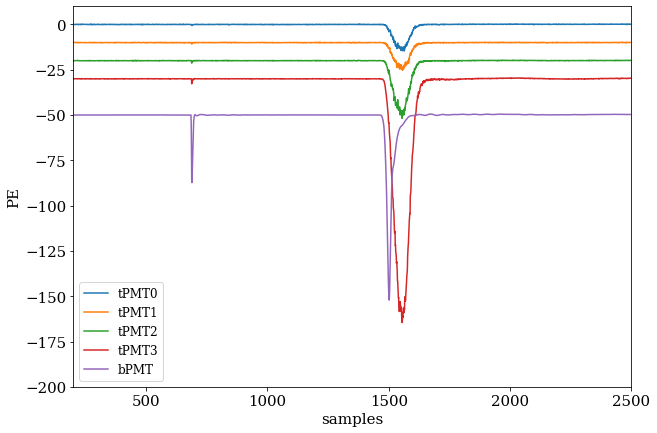

Pulses in event: 2
driftTime: 752.0

Pulse 1:
ch0Area: 36.26405500704398
ch1Area: 34.39897787395008
ch2Area: 36.92049359387859
ch3Area: 94.58268150391098
topSumArea: 202.1662079787836
botArea: 2447.7148569876686
totalArea: 2649.881064966452
ch0Height: 4.82116694254605
ch1Height: 5.754492693429032
ch2Height: 8.40948668435689
ch3Height: 21.636654144816845
topSumHeight: 40.16819408842766
botHeight: 387.60044825080394
totalHeight: 427.7686423392316
topSumWidth: 12.0
botWidth: 9.0
totalWidth: 9.0
topSumRMS: 2.5853041658268543
botRMS: 2.134991590099284
totalRMS: 2.1211975728646144
topSum05: 685.0
bot05: 685.0
total05: 685.0
topSum50: 688.0
bot50: 689.0
total50: 689.0
topSum95: 697.0
bot95: 694.0
total95: 694.0
startTime: 675.0
endTime: 708.0
eventNum: 217.0

Pulse 2:
ch0Area: 9730.720048354784
ch1Area: 9286.947095835803
ch2Area: 21218.49991297566
ch3Area: 101195.21018378649
topSumArea: 141431.37724095274
botArea: 29082.857022296103
totalArea: 170514.23426324886
ch0Height: 133.68919478107844


In [70]:
#parameters:

#required: selFiles, rawFiles, RQs, file number, event number

#optional:

#use xrange and yrange to zoom in or out in x or y

#select scale to be PE (scale=PE), mV (scale=mV), or ADC counts (default)

#display each individual channel (channels='all') the topSum and 
#bPMT (channels='tb'), or the total waveform (default)

#choose whether to display RQs (printRQs = True) or not (default)

MiXHelper.ViewEvent(selFiles,rawFiles,RQs,200,217,scale=PE,channels='all',printRQs=True,xrange=[200,2500],yrange=[-200,10])